In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime

Origination Date

In [ ]:
# Simulate a first of month date
# Model business levels across years

# 2005~2022
years_orig = np.arange(2005,2023)
temp = np.arange(1,len(years_orig))

# probability
probs = temp/sum(temp)
probs

array([0.00653595, 0.0130719 , 0.01960784, 0.02614379, 0.03267974,
       0.03921569, 0.04575163, 0.05228758, 0.05882353, 0.06535948,
       0.07189542, 0.07843137, 0.08496732, 0.09150327, 0.09803922,
       0.10457516, 0.11111111])

In [ ]:
sum(probs)

1.0

Simulate Date: Monthly data

In [ ]:
sim_year_orig = np.random.choice(years_orig,10,probs.tolist())
sim_year_orig

array([2009, 2008, 2014, 2011, 2011, 2005, 2013, 2015, 2018, 2010])

(array([1., 0., 1., 2., 2., 0., 2., 1., 0., 1.]),
 array([2005. , 2006.3, 2007.6, 2008.9, 2010.2, 2011.5, 2012.8, 2014.1,
        2015.4, 2016.7, 2018. ]),
 <BarContainer object of 10 artists>)

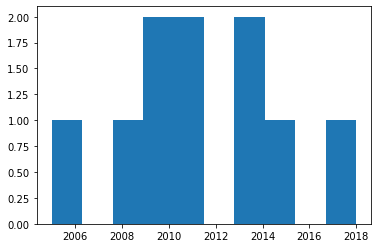

In [ ]:
plt.hist(sim_year_orig)

In [ ]:
# year
sim_year_orig = np.random.choice(years_orig,10,probs.tolist())[0]
sim_year_orig

In [ ]:
# month
months_orig = np.arange(1,12+1)
sim_month_orig = np.random.choice(months_orig,1)[0]

date_orig = datetime.datetime(sim_year_orig,sim_month_orig,1).date()
date_orig

datetime.date(2022, 1, 1)

Term, Rate

In [ ]:
# term (months)

terms = [6, 12]
probs = [.25, .75]
term = np.random.choice(terms,1,probs)[0]
term

6

In [ ]:
# create dictionary of loan sizes, indexed by term as 'size by term'

size_by_term = {
    6:[10000, 50000],
    12:[50000, 100000, 200000]
}

size = np.random.choice(size_by_term[term],1)[0]
size

10000

In [ ]:
# rate (range: 5% ~ 40%)

rate = np.random.randint(1,8+1) * .05

In [ ]:
# pd at orig from rate

pd_orig = rate**2
pd_orig = rate * 2.5

Unpaid Principal Balance (UPB)
: to create history

* UPB
* Status
* Model (pd_model)

In [ ]:
# UPB by date
# Set initial value

# UPB as proportion of loan size

UPB = {}
UPB[date_orig] = 1

In [ ]:
# status by date
# Set initial value
status = {}
status[date_orig] = 'Active'

In [ ]:
# pd by date
# Set initial value
pd_model = {}
pd_model[date_orig] = pd_orig

In [ ]:
# Internal variables

# Simulate whether or not default occurs using pd at orig
delinquency = 0
defaultYN = np.random.uniform(0,1,1)[0] < pd_orig

In [ ]:
# skipped
# Print Work
formatStr = "{:<5} {:<15} {:<10} {:<10} {:<10} {:<10}"

print (formatStr.format('i','date','status','delq','upb','pd'))

def printIt():
  if printme:
    print(formatStr.format(i,str(date_i),status[date_i],delinquency,round(UPB[date_i],4),round(pd_model[date_i],2)))


i     date            status     delq       upb        pd        


Test

In [ ]:
printme = 1

In [ ]:
# Simulute History in non-default case
# Populate upb, status, pd

TEST_DEFAULT = 1
if TEST_DEFAULT:
  defaultYN = 0
  print("Testing with defaultYN set to 0")


if not defaultYN:
  for i in range(1,term+1):
    date_i = date_orig + relativedelta(months = i)
    # date 1 = origination date + 1 month

    UPB[date_i] = 1 - i/term
    # UPB[1] = 100% - 1/term

    status[date_i] = 'Active'
    pd_model[date_i] = pd_orig
    
    printIt()

Testing with defaultYN set to 0
1     2022-02-01      Active     0          0.8333     1.0       
2     2022-03-01      Active     0          0.6667     1.0       
3     2022-04-01      Active     0          0.5        1.0       
4     2022-05-01      Active     0          0.3333     1.0       
5     2022-06-01      Active     0          0.1667     1.0       
6     2022-07-01      Active     0          0.0        1.0       


In [ ]:
# Simulute History in default case
# Populate upb, status, pd

TEST_DEFAULT = 1
if TEST_DEFAULT:
  defaultYN = 1
  delinquency = 0
  print("Testing with defaultYN set to 0")

if defaultYN:
  default_time = np.random.choice(np.arange(1,term),1)[0]
  # first period - abundant cash but as time goes, balloon payment and amortization

  for i in range(1,default_time+0):        # exclude default time
    date_i = date_orig + relativedelta(months = i)
    UPB[date_i] = 1 - i/term
    status[date_i] = 'Active'
    pd_model[date_i] = pd_orig
    printIt()
    
  for i in range(1,default_time+1):        # include default time
    date_i = date_orig + relativedelta(months = i)
    UPB[date_i] = 1 - i/term
    delinquency += 1                       # add a new internal variable
    status[date_i] = 'Default' + str(delinquency)
    pd_model[date_i] = pd_orig
    printIt()
  
  for i in range(default_time+1, term+1):  # default time +1 ~ till the end of the term
    date_i = date_orig + relativedelta(months = i)
    delinquency += 1                       
    p_recovery = (.5 - rate)**delinquency  # probability recovery rate - it will keep decreasing towards the end of the term
    recoverYN = np.random.uniform(0,1,1)[0] < p_recovery
    pd_model[date_i] = pd_orig**(1/delinquency)

    ## (1) If recovered
    if recoverYN:
      print('Recovered')
      for i in range(i, term+1):           # term: start ~ end
        date_i = date_orig + relativedelta(months = i)
        UPB[date_i] = 1 - i/term
        delinquency = 0
        status[date_i] = 'Active'
        pd_model[date_i] = pd_orig
        printIt()
      break

    ## (2) If not recovered, then keep increasing delinquency
    else: 
      UPB[date_i] = UPB[date_i + relativedelta(months = -1)]  
      # case: unpaid balance in case the payment was not made in the previous month, UPB month2 = UPB month2-1
      status[date_i] = 'Default' + str(delinquency)
      if delinquency == 3:
        status[date_i] = 'WriteOff'
        printIt()
        break

      printIt()

Testing with defaultYN set to 0
1     2022-02-01      Active     0          0.8333     1.0       
1     2022-02-01      Default1   1          0.8333     1.0       
2     2022-03-01      Default2   2          0.6667     1.0       
3     2022-04-01      WriteOff   3          0.6667     1.0       
